In [41]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.mixture import GaussianMixture

(array([0.00094747, 0.        , 0.        , 0.        , 0.00094747,
        0.00094747, 0.00094747, 0.        , 0.        , 0.00094747,
        0.0028424 , 0.00094747, 0.00094747, 0.00094747, 0.00094747,
        0.00189494, 0.00189494, 0.00094747, 0.0028424 , 0.0028424 ,
        0.00378987, 0.00473734, 0.0028424 , 0.00852721, 0.00189494,
        0.00473734, 0.00757974, 0.00473734, 0.00663228, 0.01136962,
        0.01042215, 0.00473734, 0.00568481, 0.00568481, 0.01231709,
        0.01042215, 0.01136962, 0.01136962, 0.00568481, 0.01136962,
        0.01136962, 0.00852721, 0.01042215, 0.01042215, 0.00852721,
        0.00663228, 0.00852721, 0.01136962, 0.00663228, 0.00473734,
        0.01136962, 0.01042215, 0.0028424 , 0.0028424 , 0.00852721,
        0.00663228, 0.00568481, 0.00189494, 0.00378987, 0.00189494,
        0.00378987, 0.00947468, 0.00757974, 0.01326455, 0.01705443,
        0.02937151, 0.03979366, 0.05874302, 0.08053479, 0.10043162,
        0.07106011, 0.08811453, 0.07484998, 0.04

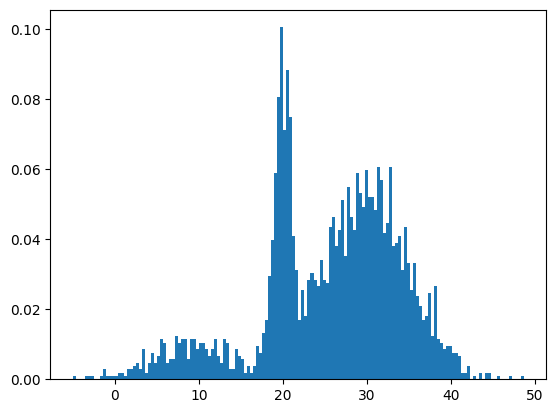

In [42]:
# Load data
formation_channels = np.load("formationchannels.npy")

# Plot data
nbins = 150
plt.hist(formation_channels, nbins, density=True)

In [43]:
# Maximum number of gaussians in the gaussian mixture to be tested 
N = 10

# Fit different gaussian mixtures with different number of components to the data
gms = [GaussianMixture(n_components=i+1, random_state=0).fit(formation_channels) for i in range(N)]

# Compute the AIC for every model and choose the best one
AICs = [gms[i].aic(formation_channels) for i in range(N)]
best_gm_index = np.argsort(AICs)[0]

# Print the results for the best fit
print("BEST FIT:")
print("Number of gaussians = " + str(best_gm_index + 1))
print("\nMeans:")
print(gms[best_gm_index].means_)
print("\nCovariances:")
print(gms[best_gm_index].covariances_)
print("\nAIC:")
print(gms[best_gm_index].aic(formation_channels))


BEST FIT:
Number of gaussians = 3

Means:
[[30.12430964]
 [20.05198472]
 [ 9.09213997]]

Covariances:
[[[24.11386033]]

 [[ 1.13730617]]

 [[21.79683296]]]

AIC:
20083.309155309096


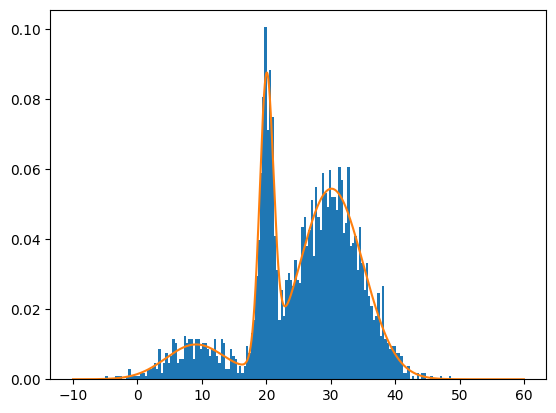

In [44]:
# Create an x-axis and give it the right shape in order to
# let it talk with sklearn functions outputs
x_grid = np.linspace(-10, 60, 10000)
x_grid = x_grid[:, np.newaxis]

# Compute the log-likelihood of our "x_grid" sample using the best fitted parameters
model = gms[best_gm_index].score_samples(x_grid)

# Plot the result, remembering to exponentiate the result from score_sample
plt.hist(formation_channels, nbins, density=True)
plt.plot(x_grid, np.exp(model))